# **타이타닉 데이터 분석**

## 1. 데이터셋
+ RMS 타이타닉은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선으로, 1912년 4월 10일 첫 출항하였다. 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 중에 4월 15일 빙산과 충돌하여 침몰하였으며, 이로 인해 1,514명이 사망한 것으로 알려져 있다.
+ 타이타닉 데이터를 분석하여 생존에 영향을 준 요인을 파악하고, 이를 바탕으로 생존 여부를 예측하는 모델을 학습해보자.

## 데이터
+ seaborn 라이브러리에서 제공하는 titanic 데이터 사용
+ survived: 생존 여부(0, 1)
+ pclass: 객실 등급(1, 2, 3)
+ sex: 성별
+ age: 나이
+ sibsp: 함께 탑승한 형제자매, 배우자 수
+ parch: 함께 탑승한 부모, 자식 수
+ fare: 요금
+ embarked: 탑승 항구(S, C, Q)
+ class: 객실 등급(First, Second, Third)
+ who: 사람 구분(man, woman, child)
+ adult_male: 성인 남자 여부(True, False)
+ deck: 갑판
+ embark_town: 탑승 항구(Southhampton, Cherbourg, Queenstown)
+ alive: 생존여부(no, yes)
+ alone: 1인 탑승 여부(True, False)


## 2. 데이터 확인 및 전처리

In [41]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 윈도우 기본 한글 폰트 경로 (확인 후 변경 가능)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [43]:
#!pip install scikit-learn

In [86]:
# 데이터 불러오기
from sklearn.model_selection import train_test_split
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [87]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
# # 데이터 전처리 : 결측값 확인
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [90]:
# 결측치 처리
df1 = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked']].copy()

df1.head()

,survived,pclass,sex,age,sibsp,fare,embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [91]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
fare          0
embarked      2
dtype: int64

In [92]:
# age는 평균으로 대체
df1['age'] = df1['age'].fillna(df1['age'].mean())

In [93]:
# embarked는 최빈값으로 대체
df1['embarked'] = df1['embarked'].fillna(df1['embarked'].mode()[0])

In [94]:
df1.head()

,survived,pclass,sex,age,sibsp,fare,embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [95]:
# 확인
print(df1.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
fare        0
embarked    0
dtype: int64


## 3. 학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 7:3 비율로 분할함

In [59]:
# 5. 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [96]:
# 학습/평가 데이터 분할 (7:3 비율)
X = df1.drop('survived', axis=1)                # feature 
y = df1['survived']                             # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
X_train

,pclass,sex,age,sibsp,fare,embarked
445,1,male,4.000000,0,81.8583,S
650,3,male,29.699118,0,7.8958,S
172,3,female,1.000000,1,11.1333,S
450,2,male,36.000000,1,27.7500,S
314,2,male,43.000000,1,26.2500,S
...,...,...,...,...,...,...
106,3,female,21.000000,0,7.6500,S
270,1,male,29.699118,0,31.0000,S
860,3,male,41.000000,2,14.1083,S
435,1,female,14.000000,1,120.0000,S


## 4. 데이터 탐색

In [99]:
# 요약 통계량 확인
df1_train = pd.concat([X_train, y_train], axis=1)
df1_train.describe()

,pclass,age,sibsp,fare,survived
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.341894,29.344479,0.576244,31.840730,0.370787
std,0.819945,13.028013,1.216267,51.027372,0.483404
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,7.925000,0.000000
50%,3.000000,29.699118,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,30.750000,1.000000
max,3.000000,80.000000,8.000000,512.329200,1.000000


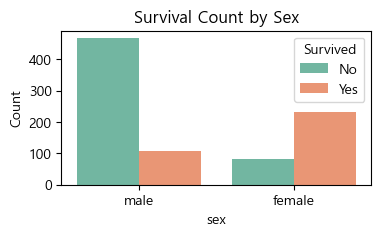

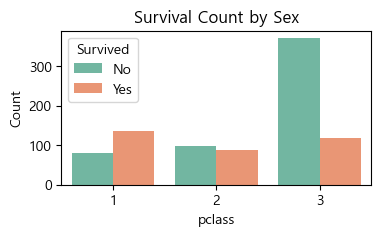

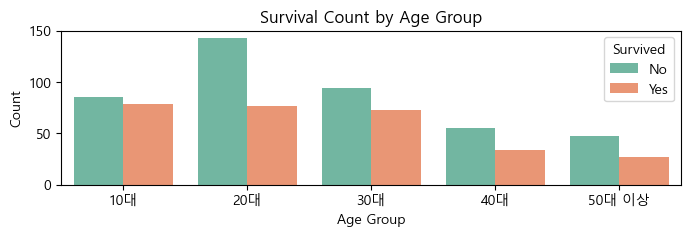

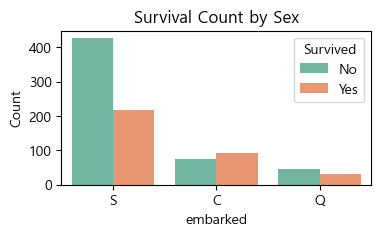

In [100]:
# survived와 변수 비교하여 분석
plt.figure(figsize=(4,2))
sns.countplot(data=df, x='sex', hue='survived', palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.figure(figsize=(4,2))
sns.countplot(data=df, x='pclass', hue='survived', palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

bins = [0, 19, 29, 39, 49, 120]
labels = ['10대', '20대', '30대', '40대', '50대 이상']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(8, 2))
sns.countplot(data=df, x='age_group', hue='survived', palette='Set2')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(4,2))
sns.countplot(data=df, x='embarked', hue='survived', palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10616\1835366976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df1_train, palette='Set2')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10616\1835366976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df1_train, palette='Set2')


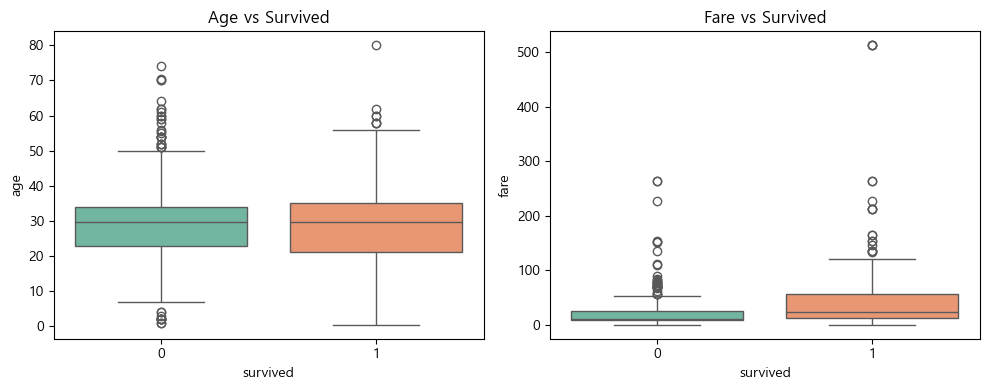

In [101]:
plt.figure(figsize=(10, 4))

# 나이 vs 생존
plt.subplot(1, 2, 1)
sns.boxplot(x='survived', y='age', data=df1_train, palette='Set2')
plt.title('Age vs Survived')

# 요금 vs 생존
plt.subplot(1, 2, 2)
sns.boxplot(x='survived', y='fare', data=df1_train, palette='Set2')
plt.title('Fare vs Survived')

plt.tight_layout()
plt.show()

In [102]:
# 상관계수
corr_matrix = df[['pclass', 'age', 'sibsp', 'fare', 'survived']].corr()
upp_mat = np.triu(corr_matrix)
# 상관계수 출력
print(corr_matrix)


            pclass       age     sibsp      fare  survived
pclass    1.000000 -0.369226  0.083081 -0.549500 -0.338481
age      -0.369226  1.000000 -0.308247  0.096067 -0.077221
sibsp     0.083081 -0.308247  1.000000  0.159651 -0.035322
fare     -0.549500  0.096067  0.159651  1.000000  0.257307
survived -0.338481 -0.077221 -0.035322  0.257307  1.000000


C:\Users\default.DESKTOP-VHFHFGU\anaconda3\envs\myenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\default.DESKTOP-VHFHFGU\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


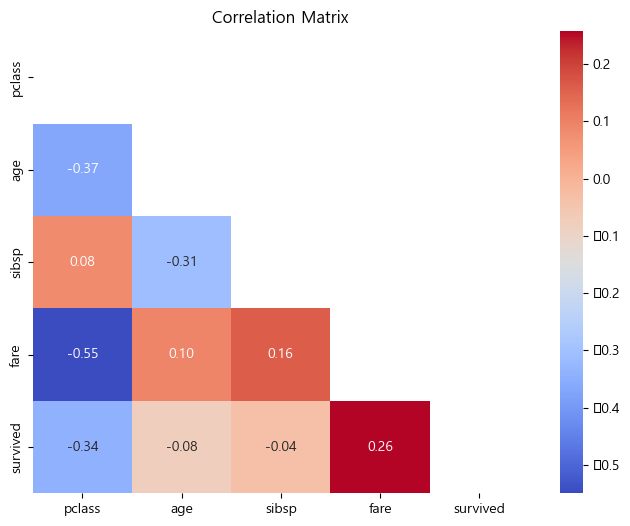

In [103]:
# 표현
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=upp_mat, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<br>

## 5. 분류모델 학습

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [105]:
# 0. 범주형 변수 숫자로 변환
df1['sex'] = df1['sex'].map({'female': 0, 'male': 1})
df1['embarked'] = df1['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [106]:
# 상관관계가 존재하는 특성(feature) 선택
features = ['pclass', 'age', 'sibsp', 'fare']
X_train = df1_train[features] 

In [107]:
# 1. Feature/Target 분리
X = df1.drop(['survived'], axis=1)  # survived 제외
y = df1['survived']  # target은 0/1

In [108]:
# 2. 학습/평가 데이터 분할 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# 3. 최적의 k 찾기
k_range = range(1, 20, 2)  # 1, 3, 5, ..., 19
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f"k = {k}일 때 평균 정확도: {scores.mean():.3f}")

k = 1일 때 평균 정확도: 0.650
k = 3일 때 평균 정확도: 0.682
k = 5일 때 평균 정확도: 0.679
k = 7일 때 평균 정확도: 0.705
k = 9일 때 평균 정확도: 0.695
k = 11일 때 평균 정확도: 0.701
k = 13일 때 평균 정확도: 0.706
k = 15일 때 평균 정확도: 0.698
k = 17일 때 평균 정확도: 0.697
k = 19일 때 평균 정확도: 0.695


In [111]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 13이며, 평균 정확도는 0.706


In [112]:
# K-NN 분류모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#학습데이터로 학습한 분류모델에 평가데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)

# 분류모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy =accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {precision:.3f}")
print(f"재현율 : {recall:.3f}")

정확도 : 0.694
정밀도 : 0.694
재현율 : 0.694


<br>


## 6. 회귀모델 평가

+ CNN 분류 모델의 성능 평가 결과, 정확도는 0.694로, 전체 데이터 중 약 69.4%를 올바르게 예측했다는 의미를 가진다.
+ 정밀도 역시 0.694로, 모델이 양성이라고 판단한 예측 중 실제로 맞춘 비율이 69.4%임을 나타낸다.
+ 재현율도 0.694로, 실제 양성 데이터 중에서 모델이 제대로 찾아낸 비율이 동일하게 69.4%였다.
+ 세 지표가 모두 동일하다는 점은 예측이 특정 클래스에 치우치지 않고 균형 있게 작동했음을 시사한다. 하지만 이 수치는 뛰어난 성능이라고 보긴 어려우며, 개선 여지가 충분히 있다. 예를 들어, 데이터 전처리나 하이퍼파라미터 조정, 모델 구조 변경 등을 통해 성능을 높일 수 있다.
+ 종합적으로 봤을 때, 모델은 기본적인 분류 능력을 갖추었지만 실전 적용을 위해선 추가 개선이 필요하다.